### Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

path = r"<PATH_TO_YOUR_INPUT_DIRECTORY>"

df = pd.read_csv(path)

# Show shape and first few rows
print("Shape:", df.shape)
df.head()

Shape: (13656, 49)


,video_id,title,tags,published_at,duration,view_count,like_count,comment_count,thumbnail_url,channel_name,...,text_presence,num_text,sentiment_neg,sentiment_pos,sentiment_neu,yolo_objects,object_count_yolo,sentiment_score,title_sentiment_score,text_sentiment_score
0,csXdSeDbDgA,How to Stop Overthinking (and Finally Achieve ...,"['Ali Abdaal', 'Ali abdal']",2025-06-03 15:30:31,1069,128217,5438,321,https://i.ytimg.com/vi/csXdSeDbDgA/hqdefault.jpg,Ali Abdaal,...,1,5,0.0,0.000,1.000,"['book', 'person', 'person', 'potted plant']",4.0,0.0,0.8402,0.9621
1,k_K9MbqNhA0,17 Cheap Purchases That Actually Improved My Life,"['Ali Abdaal', 'Ali abdal']",2025-05-03 13:01:19,985,221462,6493,366,https://i.ytimg.com/vi/k_K9MbqNhA0/hqdefault.jpg,Ali Abdaal,...,1,2,0.0,0.000,1.000,"['cell phone', 'person', 'cell phone']",3.0,0.0,0.8668,0.0000
2,MPECDuOUBEY,Why Everyone Should Start a YouTube Channel,"['Ali Abdaal', 'youtube', 'grow on youtube 2025']",2025-04-11 15:00:36,946,304358,8874,900,https://i.ytimg.com/vi/MPECDuOUBEY/hqdefault.jpg,Ali Abdaal,...,1,1,0.0,0.623,0.377,"['person', 'cell phone', 'potted plant']",3.0,0.0,0.7184,0.0000
3,jP1uwBcpUeE,Watch this if you feel like you’re behind in life,"['Ali Abdaal', 'Ali abdal']",2025-04-04 13:01:13,1152,97108,3305,131,https://i.ytimg.com/vi/jP1uwBcpUeE/hqdefault.jpg,Ali Abdaal,...,1,5,0.0,0.000,1.000,['clock'],1.0,0.0,0.8402,0.7184
4,6T-mgthXWzM,Watch this if you never have enough time,"['Ali Abdaal', 'Ali abdal']",2025-03-18 14:00:09,874,159999,5496,194,https://i.ytimg.com/vi/6T-mgthXWzM/hqdefault.jpg,Ali Abdaal,...,1,1,0.0,0.000,1.000,"['keyboard', 'scissors', 'bowl', 'cell phone',...",5.0,0.0,0.0000,0.0000


In [5]:
# List all columns
print("Columns:", df.columns.tolist())

# Data types and non-null counts
print("\nInfo:")
df.info()

# Display a random sample
df.sample(5)


Columns: ['video_id', 'title', 'tags', 'published_at', 'duration', 'view_count', 'like_count', 'comment_count', 'thumbnail_url', 'channel_name', 'channel_subscribers', 'channel_country', 'title_len', 'tags_list', 'tags_presence', 'tags_count', 'image_path', 'edge_count', 'entropy_mean', 'age', 'gender', 'dominant_emotion', 'face_count', 'angry', 'fear', 'neutral', 'sad', 'disgust', 'happy', 'surprise', 'face_present', 'brightness_pil', 'colorfulness_pylette', 'colorfulness_cv', 'brightness_cv', 'dominant_color_r', 'dominant_color_g', 'dominant_color_b', 'easyocr_text_list', 'text_presence', 'num_text', 'sentiment_neg', 'sentiment_pos', 'sentiment_neu', 'yolo_objects', 'object_count_yolo', 'sentiment_score', 'title_sentiment_score', 'text_sentiment_score']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13656 entries, 0 to 13655
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   video_id 

,video_id,title,tags,published_at,duration,view_count,like_count,comment_count,thumbnail_url,channel_name,...,text_presence,num_text,sentiment_neg,sentiment_pos,sentiment_neu,yolo_objects,object_count_yolo,sentiment_score,title_sentiment_score,text_sentiment_score
6147,ouuoUglcSDc,Create a FOOL-PROOF Content Calendar in 5 Easy...,"['create a content calendar planner', 'Create ...",2022-11-28 10:49:35,1360,3708,66,7,https://i.ytimg.com/vi/ouuoUglcSDc/hqdefault.jpg,Anyusha,...,1,3,0.0,0.0,1.0,"['person', 'remote', 'tv']",3.0,0.0,0.8757,0.4588
4061,HKRFvY6GrvE,How to glow up in winter in a week (7 day plan),"['how to glow up', 'glow up', 'glow up tips', ...",2023-11-26 19:30:00,400,360505,16186,142,https://i.ytimg.com/vi/HKRFvY6GrvE/hqdefault.jpg,Collin The Chad,...,1,1,0.0,0.0,1.0,"['person', 'book', 'person', 'tennis racket', ...",5.0,0.0,0.7184,0.0000
10555,4JViZlfqphE,Declutter + SWAP fun! Best motivation to start...,"['declutter fun', 'best declutter motivation',...",2022-04-06 14:06:31,1057,13699,1045,92,https://i.ytimg.com/vi/4JViZlfqphE/hqdefault.jpg,Diane in Denmark,...,1,3,0.0,0.0,1.0,"['person', 'person', 'person', 'person', 'pers...",12.0,0.0,0.7639,0.5766
4823,Y3whl9RiQ3I,Why I Left YouTube... And Why I'm Back,"['why i left', 'how to grow on youtube', 'yout...",2025-01-13 15:00:49,792,5591,482,181,https://i.ytimg.com/vi/Y3whl9RiQ3I/hqdefault.jpg,Yididya,...,1,3,0.0,0.0,1.0,['person'],1.0,0.0,0.5766,0.0000
7824,lOnvXdwukkQ,Notion Masterclass: Build an Expense Tracker f...,"['notion', 'notionhq', 'notion app', 'notion t...",2024-02-14 15:12:45,1991,59570,1174,148,https://i.ytimg.com/vi/lOnvXdwukkQ/hqdefault.jpg,Thomas Frank Explains,...,1,14,0.0,0.0,1.0,['person'],1.0,0.0,0.7184,0.8402


In [ ]:
# Count missing values per column
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])


In [6]:
# Numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Descriptive statistics
df[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
duration,13656.0,1064.989162,1622.292176,240.000000,464.000000,6.570000e+02,9.960000e+02,4.300800e+04
view_count,13656.0,72806.541301,332819.355978,0.000000,260.000000,2.189500e+03,2.424650e+04,1.564538e+07
like_count,13656.0,2726.036834,13663.849638,0.000000,12.000000,6.950000e+01,9.310000e+02,5.568930e+05
comment_count,13656.0,106.933582,451.696064,0.000000,2.000000,1.200000e+01,5.900000e+01,2.223200e+04
channel_subscribers,13656.0,344932.491798,996662.030727,1.000000,2520.000000,2.280000e+04,1.890000e+05,6.340000e+06
title_len,13656.0,57.523286,19.175484,4.000000,43.000000,5.500000e+01,7.000000e+01,1.000000e+02
tags_count,13656.0,13.256298,10.552246,0.000000,1.000000,1.400000e+01,2.200000e+01,5.400000e+01
edge_count,13656.0,12525.565905,5029.468382,1051.000000,8907.000000,1.183900e+04,1.542350e+04,4.041700e+04
entropy_mean,13656.0,3.385950,0.779209,0.133413,3.029860,3.536222e+00,3.927964e+00,5.109024e+00
age,13656.0,14.358743,15.247336,-1.000000,-1.000000,2.200000e+01,2.800000e+01,6.100000e+01


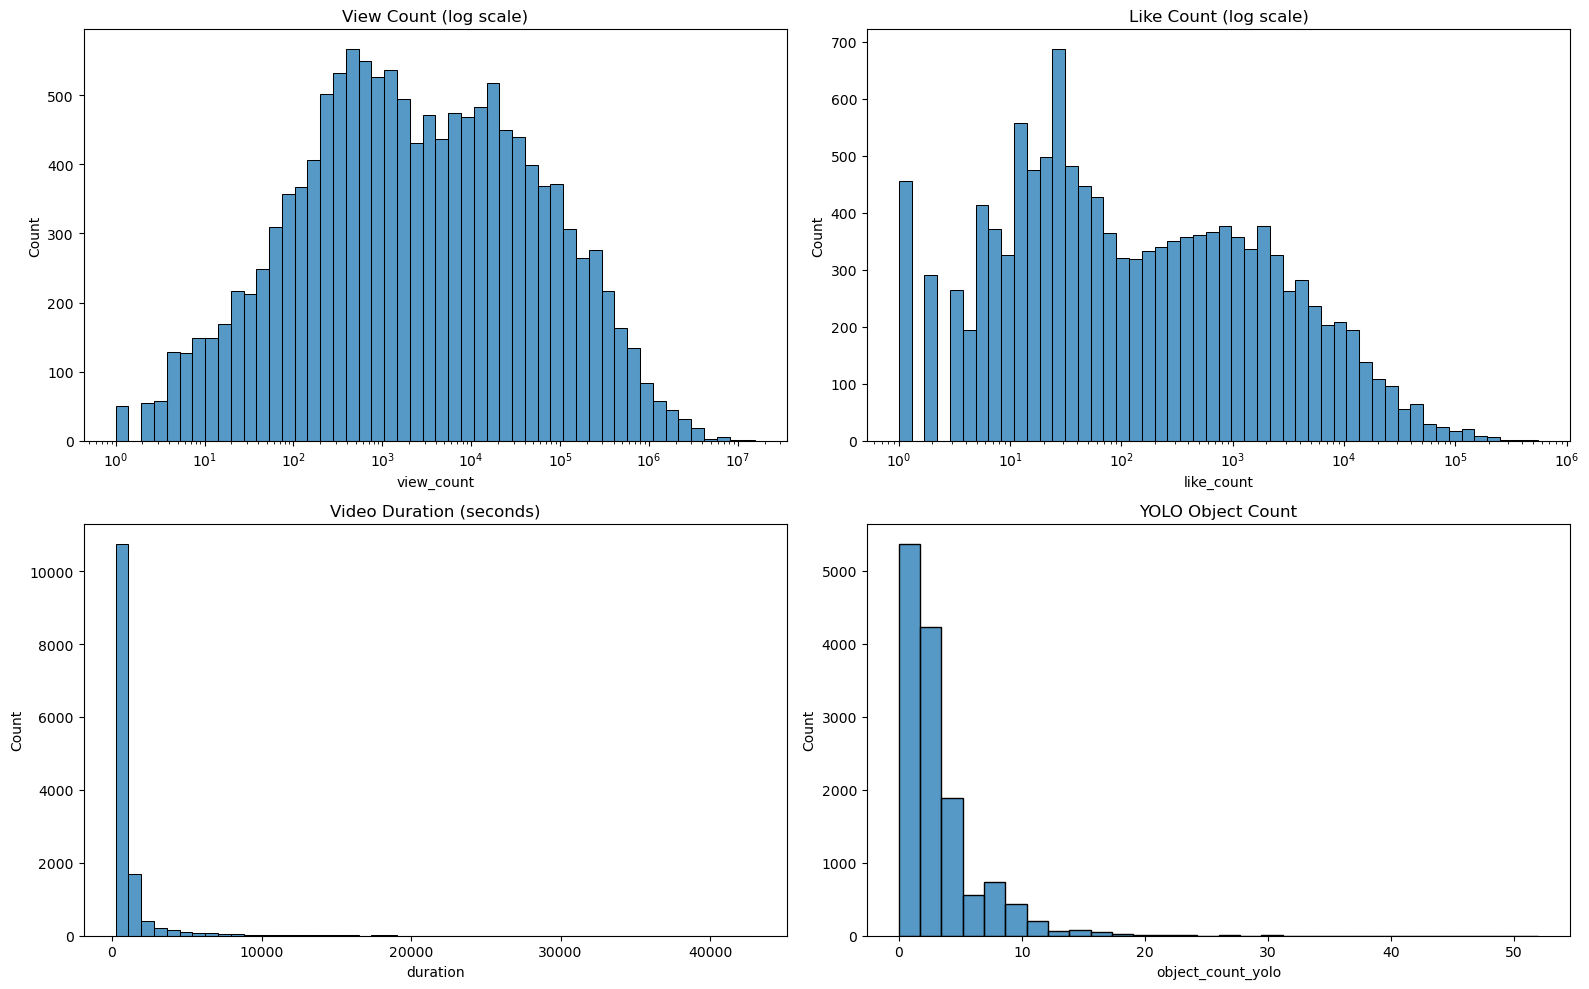

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# View count (log scale)
sns.histplot(df['view_count'], bins=50, log_scale=True, ax=axes[0,0])
axes[0,0].set_title('View Count (log scale)')

# Like count (log scale)
sns.histplot(df['like_count'], bins=50, log_scale=True, ax=axes[0,1])
axes[0,1].set_title('Like Count (log scale)')

# Duration
sns.histplot(df['duration'], bins=50, ax=axes[1,0])
axes[1,0].set_title('Video Duration (seconds)')

# YOLO object count
if 'object_count_yolo' in df.columns:
    sns.histplot(df['object_count_yolo'], bins=30, ax=axes[1,1])
    axes[1,1].set_title('YOLO Object Count')

plt.tight_layout()
plt.show()


                         count      mean       std     min     25%     50%  \
sentiment_neg          13656.0  0.029878  0.151045  0.0000  0.0000  0.0000   
sentiment_pos          13656.0  0.065820  0.215021  0.0000  0.0000  0.0000   
sentiment_neu          13656.0  0.837591  0.339819  0.0000  1.0000  1.0000   
sentiment_score        13656.0  0.000672  0.034337 -0.7500  0.0000  0.0000   
title_sentiment_score  13656.0  0.589969  0.321159 -0.7825  0.4588  0.7184   
text_sentiment_score   13656.0  0.430711  0.372545  0.0000  0.0000  0.4588   

                          75%     max  
sentiment_neg          0.0000  1.0000  
sentiment_pos          0.0000  1.0000  
sentiment_neu          1.0000  1.0000  
sentiment_score        0.0000  1.0000  
title_sentiment_score  0.8402  0.9930  
text_sentiment_score   0.7739  0.9983  


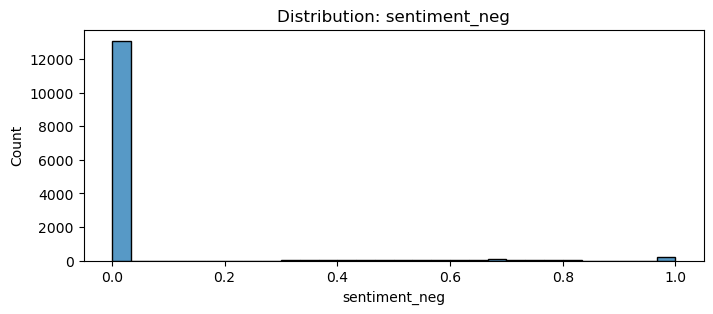

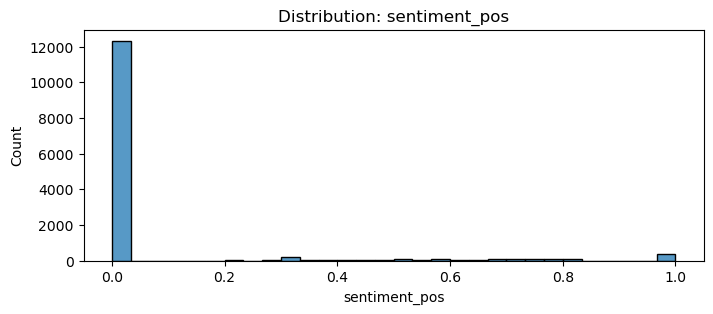

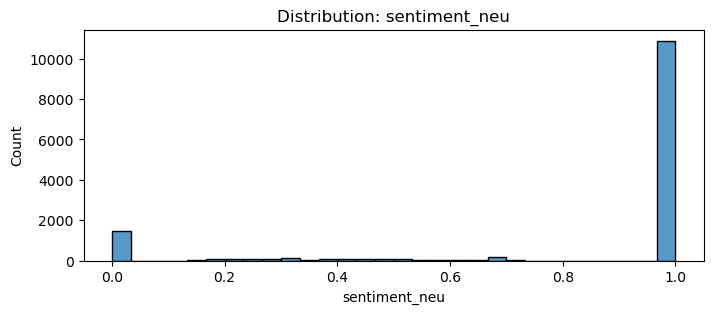

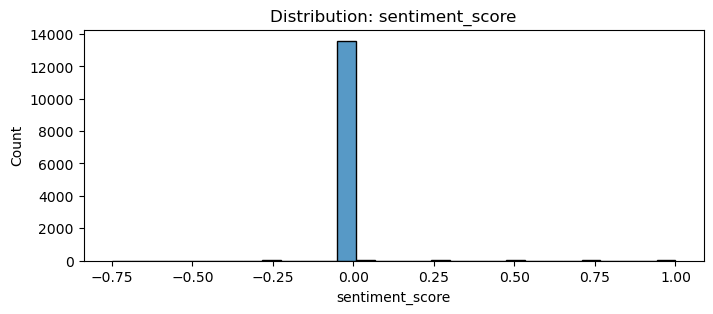

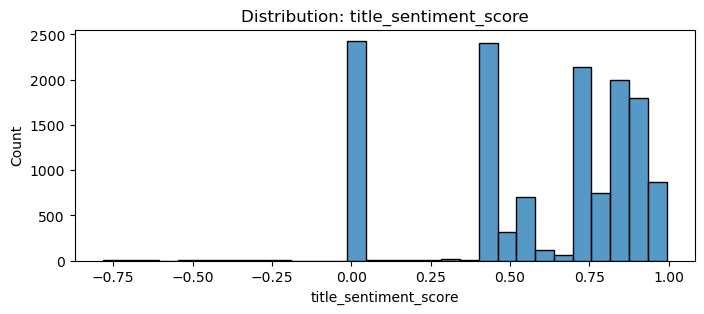

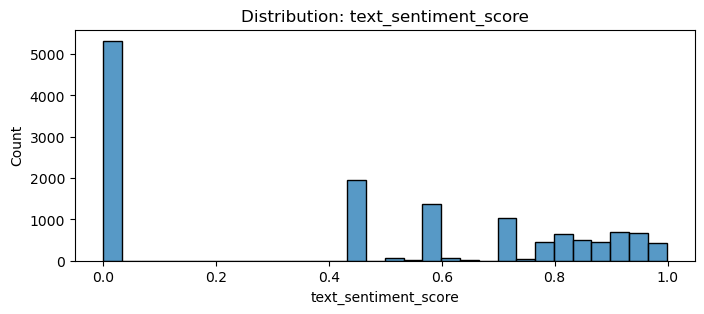

In [8]:
# Sentiment columns
sentiment_cols = ['sentiment_neg', 'sentiment_pos', 'sentiment_neu', 'sentiment_score', 
                  'title_sentiment_score', 'text_sentiment_score']

# Check which sentiment columns are present
present_sentiments = [col for col in sentiment_cols if col in df.columns]
if present_sentiments:
    print(df[present_sentiments].describe().T)

    # Plot sentiment score distributions
    for col in present_sentiments:
        plt.figure(figsize=(8, 3))
        sns.histplot(df[col], bins=30)
        plt.title(f'Distribution: {col}')
        plt.show()


count    13656.000000
mean        13.256298
std         10.552246
min          0.000000
25%          1.000000
50%         14.000000
75%         22.000000
max         54.000000
Name: num_tags, dtype: float64


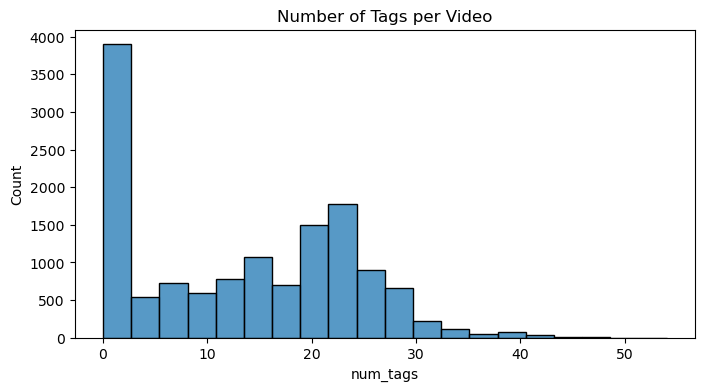

In [9]:
import ast

def count_tags(tag_str):
    try:
        tags = ast.literal_eval(tag_str)
        return len(tags) if isinstance(tags, list) else 0
    except:
        return 0

if 'tags' in df.columns:
    df['num_tags'] = df['tags'].apply(count_tags)
    print(df['num_tags'].describe())
    plt.figure(figsize=(8, 4))
    sns.histplot(df['num_tags'], bins=20)
    plt.title('Number of Tags per Video')
    plt.show()


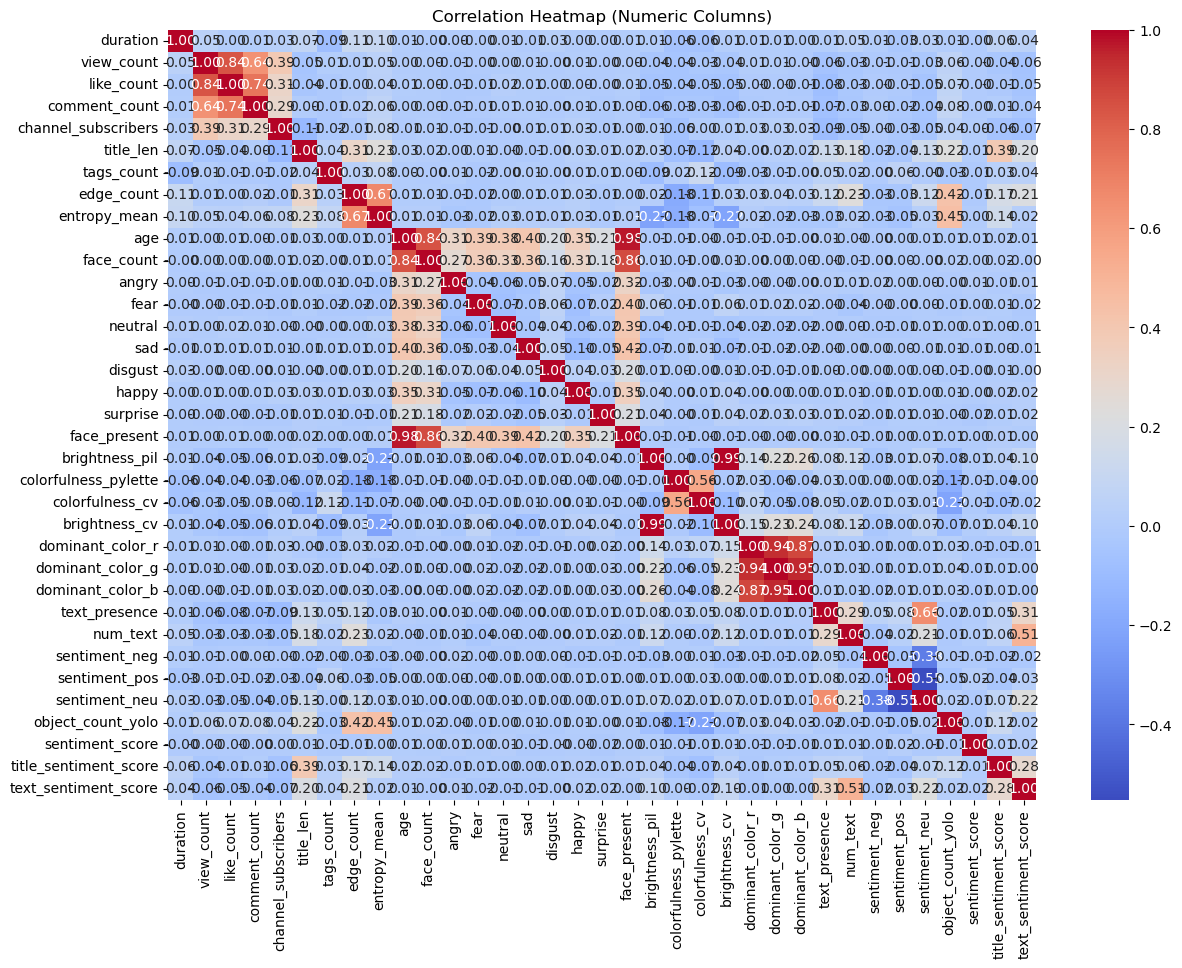

In [10]:
# Correlation matrix for numeric columns
plt.figure(figsize=(14, 10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns)')
plt.show()


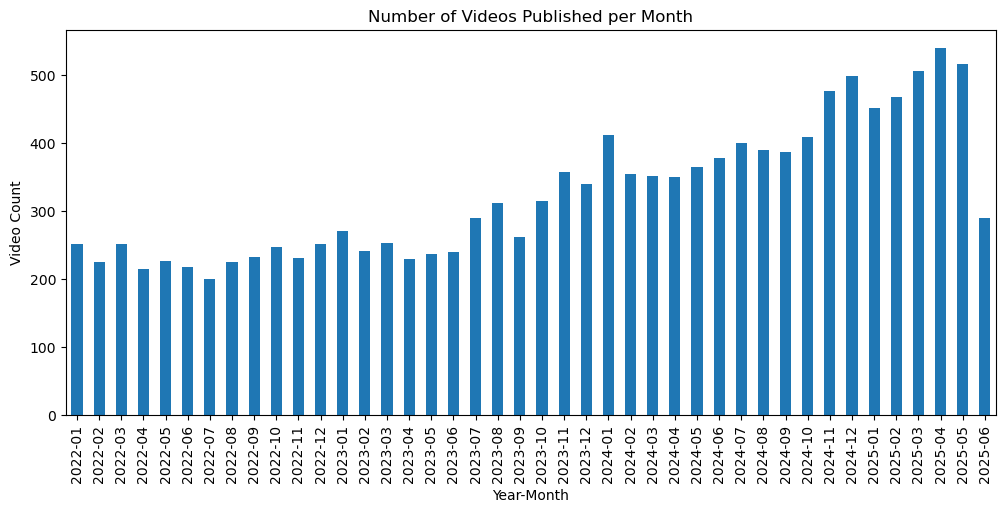

In [11]:
if 'published_at' in df.columns:
    df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')
    df['year_month'] = df['published_at'].dt.to_period('M')
    plt.figure(figsize=(12, 5))
    df['year_month'].value_counts().sort_index().plot(kind='bar')
    plt.title('Number of Videos Published per Month')
    plt.xlabel('Year-Month')
    plt.ylabel('Video Count')
    plt.show()


### Final Graphs for thesis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Mapping of original column names to new variable names
column_mapping = {
    'view_count': 'View Count',
    'like_count': 'Like Count',
    'face_present': 'Face Presence',
    'text_presence': 'Text Presence',
    'channel_subscribers': 'No. of Subscribers',
    'duration': 'Duration',
    'title_len': 'Title Length',
    'tags_presence': 'Tags Presence',
    'colorfulness_pylette': 'Colorfulness',
    'brightness_pil': 'Brightness',
    'published_at': 'Published At',
    'title_sentiment_score': 'Title Sentiment',
    'text_sentiment_score': 'Text Sentiment',
    'edge_count': 'Edge',
    'entropy_mean': 'Entropy',
    'object_count_yolo': 'No. of Objects',
    'tags_count': 'No. of Tags'
}

# List of variables to plot (use available columns)
variables_present = [
    col for col in [
        'view_count', 'like_count', 'face_present', 'text_presence',
        'channel_subscribers', 'duration', 'title_len', 'tags_presence',
        'colorfulness_pylette', 'brightness_pil', 'published_at',
        'title_sentiment_score', 'text_sentiment_score',
        'edge_count', 'entropy_mean', 'object_count_yolo', 'tags_count'
    ] if col in df.columns
]

# New names for the variables
new_names = [column_mapping[col] for col in variables_present]

output_dir = r"<PATH_TO_YOUR_OUTPUT_DIRECTORY>"

# Variables to plot with log scale
log_vars = ['view_count', 'like_count', 'channel_subscribers']

# Binary variables (adjust if column names differ in your data)
binary_vars = ['face_present', 'text_presence', 'tags_presence']

# All variables to plot (only those present in the dataframe)
all_vars = [col for col in column_mapping.keys() if col in df.columns]

for var in all_vars:
    plt.figure(figsize=(8, 5))
    if var == 'published_at':
        df[var] = pd.to_datetime(df[var])
        sns.histplot(df[var], kde=False)
        plt.title(f'Distribution of {column_mapping[var]} (Videos Published Over Time)')
        plt.xticks(rotation=45)
    elif var in log_vars:
        sns.histplot(df[var].dropna(), kde=False, log_scale=True)
        plt.title(f'Distribution of {column_mapping[var]} (Logarithmic Scale)')
    elif var in binary_vars:
        sns.countplot(x=df[var].dropna())
        plt.title(f'Distribution of {column_mapping[var]} (Binary)')
    else:
        sns.histplot(df[var].dropna(), kde=False)
        plt.title(f'Distribution of {column_mapping[var]}')
    plt.xlabel(column_mapping[var])
    plt.ylabel('Frequency')
    plt.tight_layout()
    
    # Save the figure as PNG
    filename = f"distribution_{column_mapping[var].replace(' ', '_').lower()}.png"
    output_path = os.path.join(output_dir, filename)
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close()  # Close the figure to free memory

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Create missing values plot
plt.figure(figsize=(15, 8))
missing_data = df[list(column_mapping.keys())].isnull().sum()
missing_data = missing_data.rename(index=column_mapping)
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Create bar plot
ax = sns.barplot(x=missing_data.values, y=missing_data.index, palette='viridis')
plt.title('Missing Values Distribution', fontsize=16)
plt.xlabel('Number of Missing Values', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Add annotations
for i, v in enumerate(missing_data.values):
    ax.text(v + 3, i, str(v), color='black', ha='left', va='center')

plt.tight_layout()

# Save the figure
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'missing_values_distribution.png'), 
            dpi=300, bbox_inches='tight')
plt.close()